# Import Library yang dibutuhkan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# membaca dataset

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# persiapan dataset

In [4]:
df.rename(index=str, columns={
    'Annual Income (k$)': 'income', 
    'Spending Score (1-100)': 'score'
    }, inplace=True)

In [5]:
x = df.drop(['CustomerID', 'Gender'], axis=1)

In [6]:
print(x)

     Age  income  score
0     19      15     39
1     21      15     81
2     20      16      6
3     23      16     77
4     31      17     40
..   ...     ...    ...
195   35     120     79
196   45     126     28
197   32     126     74
198   32     137     18
199   30     137     83

[200 rows x 3 columns]


# menentukan jumlah cluster dengan elbow

Text(5, 150000, 'Possible elbow point')

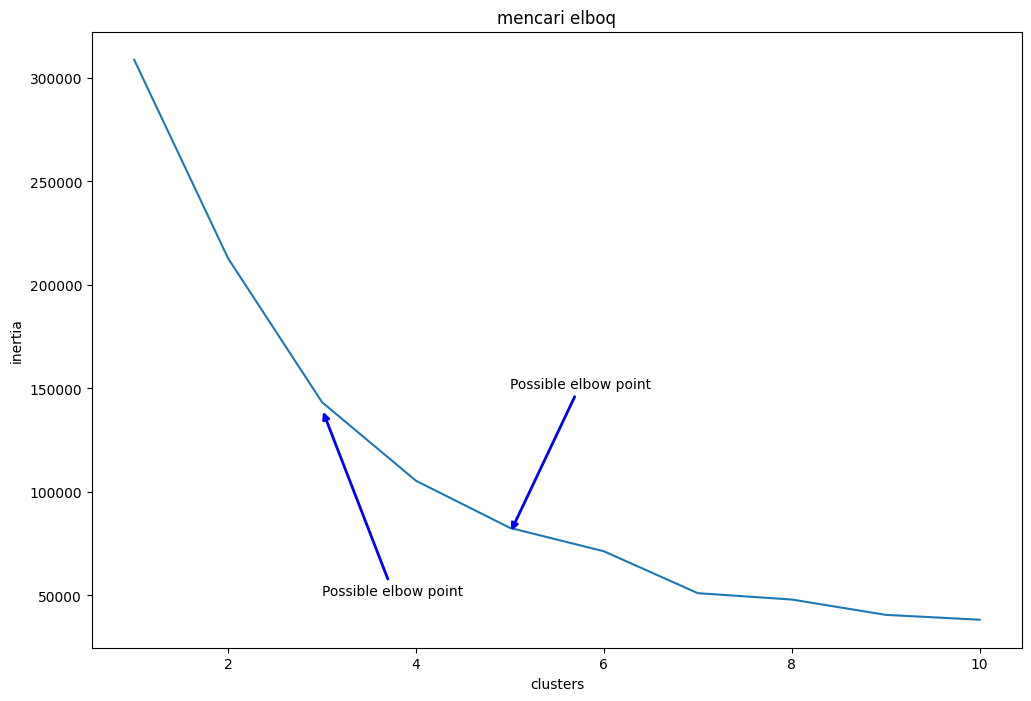

In [ ]:
clusters = []
for i in range(1,11):
    km = KMeans(n_clusters=i).fit(x)
    clusters.append(km.inertia_)

fig, ax=plt.subplots(figsize=(12,8))
sns.lineplot(x=list(range(1,11)), y=clusters, ax=ax)
ax.set_title('mencari elbow')
ax.set_xlabel('clusters')
ax.set_ylabel('inertia')

#panah elbow
ax.annotate('Possible elbow point', xy=(3,140000), xytext=(3,50000),xycoords='data',
            arrowprops=dict(arrowstyle='-|>', connectionstyle='arc3', color='blue',lw=2))
ax.annotate('Possible elbow point', xy=(5,80000), xytext=(5,150000),xycoords='data',
            arrowprops=dict(arrowstyle='-|>', connectionstyle='arc3', color='blue',lw=2))


# proses clustering

In [17]:
n_clust=4
kmean = KMeans(n_clusters=n_clust).fit(x)
x['Labels'] = kmean.labels_

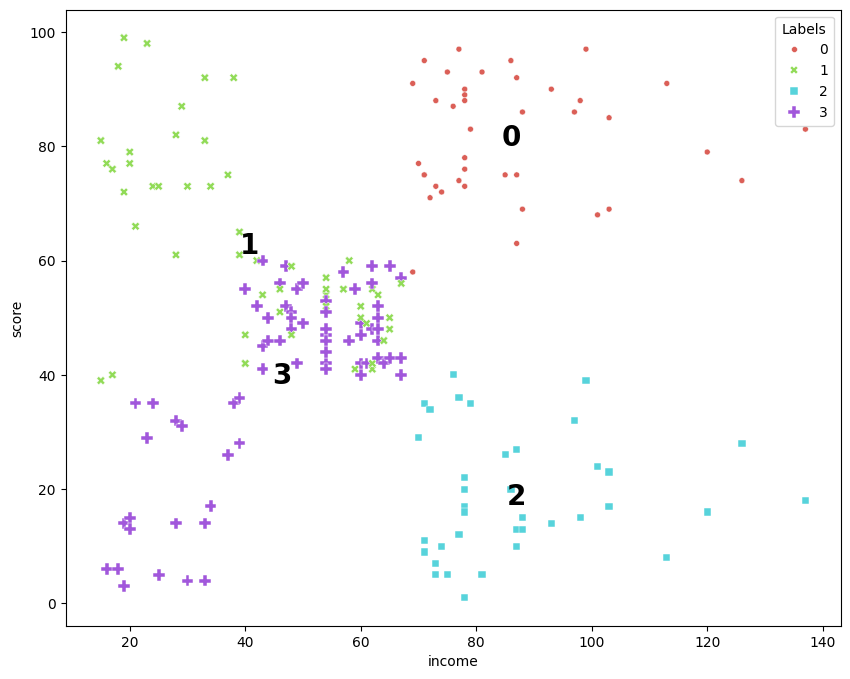

In [23]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='income', y='score', hue='Labels', style='Labels', size='Labels', data=x, palette=sns.color_palette('hls',n_clust))

for label in x['Labels'].unique():
    plt.annotate(label,
                (x[x['Labels']==label]['income'].mean(),
                x[x['Labels']==label]['score'].mean()), 
                horizontalalignment='center',
                verticalalignment='center',
                size=20,
                weight='bold',
                color='black')

In [24]:
print(x)

     Age  income  score  Labels
0     19      15     39       1
1     21      15     81       1
2     20      16      6       3
3     23      16     77       1
4     31      17     40       1
..   ...     ...    ...     ...
195   35     120     79       0
196   45     126     28       2
197   32     126     74       0
198   32     137     18       2
199   30     137     83       0

[200 rows x 4 columns]


In [27]:
x.to_excel('output_clustering.xlsx')